La Página que elegí es la siguiente: https://steamcommunity.com/app/2448970/reviews/?browsefilter=toprated&snr=1_5_100010_&filterLanguage=latam

Elegí esta página debido a que me parecio muy interesante y divertido poder analizar los comentarios sobre un juego que me gustó
tanto pero que a medida que paso el tiempo la gente fue odiando poco a poco, por lo que me gustaría ver desde cuando empezó a disgustarle a la gente
y ver que tantas horas jugaron aquellas personas, se podrán hacer buenos analisis para uso personal

In [7]:
import os
import selenium.webdriver as webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
import time
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
"""
Esta parte del codigo se encarga de generar el agente de selenium para poder acceder a la pagina por medio del navegador Edge

"""

user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:97.0) Gecko/20100101 Firefox/97.0'
edge_driver_path = os.path.join(os.getcwd(), 'msedgedriver.exe')
edge_service = Service(edge_driver_path)
edge_options = Options()
edge_options.add_argument(f'user-agent={user_agent}')

browser = webdriver.Edge(service=edge_service, options=edge_options)
"""
Elegí esta página debido a que me parecio muy interesante y divertido poder analizar los comentarios sobre un juego que me gustó
tanto pero que a medida que paso el tiempo la gente fue odiando poco a poco, por lo que me gustaría ver desde cuando empezó a disgustarle a la gente
y ver que tantas horas jugaron aquellas personas, se podrán hacer buenos analisis para uso personal
"""
browser.get("https://steamcommunity.com/app/2448970/reviews/?browsefilter=toprated&snr=1_5_100010_&filterLanguage=latam")
time.sleep(5)
"""
El agente de selenium llamado browser encuentra el body de la pagina htlm para poder empezar a actuar sobre ella

"""

body = browser.find_element("tag name", "body")

"""
browser hara scrolls para poder acceder a toda la información de la pagina

"""

for _ in range(3):
    body.send_keys(Keys.END)
    time.sleep(2)

"""
Ahora se empieza a acceder a la pagina que está estatica mediante
browser.page_source
Para luego empezar a usar la libreria de BeautifulSoup para empezar a buscar los datos en la pagina que ahora es estática
"""

page_source = browser.page_source
soup = BeautifulSoup(page_source, "html.parser")
"""
A continuación buscaremos el contenedor donde estan las reseñas para obtener información de las mismas
"""
reseña = soup.find_all("div", class_="apphub_UserReviewCardContent")

"""
Iteraremos sobre el contenedor de reseñas para poder obtener los datos que posee, los cuales son:
-Reseña Util
-Reseña Divertida
-Recomendacion (Si o No)
-Horas_Jugadas al momento de hacer la reseña
-
-
-
-
"""

with open("reseñas.csv", mode="w", newline="", encoding="utf-8") as archivo:
    encabezados = ["Calificación util", "Calificación divertido", "Recomendacion", "Horas jugadas", "Fecha de Reseña", "Reseña"]

    writer = csv.DictWriter(archivo, fieldnames=encabezados)
    writer.writeheader()

    for reseñas in reseña:

        textos = reseñas.get_text(separator = "|").split("|")
        if len(textos)> 1:
            util = textos[1].strip()
            divertida = textos[2].strip()
        elif len(textos) == 1:
            util = textos[1].strip()
            divertida = ""
        else:
            util = divertida = ""
            

        vote_header = reseñas.find("div", class_="vote_header")
        Recomendacion = reseñas.find("div", class_="title").get_text()
        Horas_Jugadas = reseñas.find("div", class_="hours").get_text()
    
    
        CardTextContent = reseñas.find("div", class_="apphub_CardTextContent")
        text_content = reseñas.find("div", class_="date_posted").get_text()
        elementos = list(CardTextContent.children)
        texto_reseña = ""
        empezar = False
        for elem in elementos:
            if elem.name =="br":
                empezar = True
                continue
            if empezar:
                if isinstance(elem,str):
                    texto_reseña += elem.strip() + "\n"
                
        texto_reseña = texto_reseña.strip()
        print(text_content)
        print(texto_reseña)

        writer.writerow({
            
            "Calificación util": util,
            "Calificación divertido": divertida,
            "Recomendacion": Recomendacion,
            "Horas jugadas": Horas_Jugadas,
            "Fecha de Reseña": text_content,
            "Reseña": texto_reseña,
            })
    
"""
Empezamos a visualizar los datos a modo de exploración
    
"""
    
    

"""
Cerramos selenium
"""

browser.quit()



"""
Organizaremos los datos extraídos en una estructura de datos
"""



Publicada el 18 de julio de 2024
Cuando hablamos de este juego es inevitable hablar de Dark and Darker y después de haber jugado los 2 puedo decir que este juego si te da la experiencia completa siendo Free2Play y a la vez tiene una jugabilidad mucho mas fluida y a la vez mejores gráficos/estilo artístico...
La mayoría de los que reseñen este juego negativamente son Fans de Dark and Darker acusando a este juego de copia o gente que compro en su momento el Dark and Darker y se siente est*pid* de haber pagado y ver que la gente elija este juego... asique si estas pensando en darle una oportunidad a este juego y lees esto entra y probalo que es F2P y saca tus propias conclusiones.
Publicada el 6 de septiembre de 2024
grandioso ♥♥♥♥♥♥♥ haciendo equipos para matar solo latinos, equipo de 9 ♥♥♥♥♥♥♥ para matar a uno de 3 solo latinos.
todas las salas pasa lo mismo, equipos de ♥♥♥♥♥♥♥ cazando a latinos. ya es mi octava de 10 partida que pasa lo mismo. gg game
no recomiendo el juego ya, simplem

'\nOrganizaremos los datos extraídos en una estructura de datos\n'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


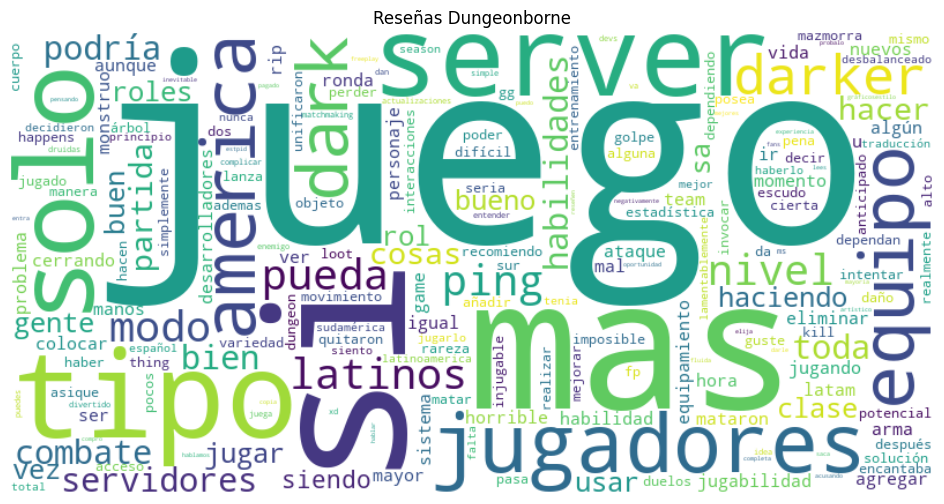

In [5]:
import pandas as pd
import re
from datetime import timedelta
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv("reseñas.csv", sep=";")
df.head()



# Leer el CSV
df = pd.read_csv("reseñas.csv")

# Convertir horas a timedelta
df["Horas jugadas"] = df["Horas jugadas"].apply(
    lambda x: timedelta(hours=float(re.search(r"[\d,.]+", str(x)).group().replace(",", "."))) if re.search(r"[\d,.]+", str(x)) else timedelta(0)
)

meses = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12"
}

def convertir_fecha(fecha_str):
    try:
        # Buscar con regex: "18 de julio de 2025"
        match = re.search(r"(\d{1,2}) de (\w+) de (\d{4})", fecha_str.lower())
        if match:
            dia, mes_texto, año = match.groups()
            mes = meses.get(mes_texto)
            if mes:
                return datetime.strptime(f"{dia}/{mes}/{año}", "%d/%m/%Y")
    except:
        pass
    return pd.NaT  # Retornar valor nulo si falla

# Diccionario de meses en español
meses = {
    "enero": "01",
    "febrero": "02",
    "marzo": "03",
    "abril": "04",
    "mayo": "05",
    "junio": "06",
    "julio": "07",
    "agosto": "08",
    "septiembre": "09",
    "octubre": "10",
    "noviembre": "11",
    "diciembre": "12"
}

def convertir_fecha(fecha_str):
    try:
        # Extraer con regex: día, mes y año
        match = re.search(r"(\d{1,2}) de (\w+) de (\d{4})", fecha_str.lower())
        if match:
            dia, mes_texto, año = match.groups()
            mes = meses.get(mes_texto)
            return datetime.strptime(f"{dia}/{mes}/{año}", "%d/%m/%Y")
    except:
        pass
    return pd.NaT

# Aplicar al DataFrame
df["Fecha de Reseña"] = df["Fecha de Reseña"].apply(convertir_fecha)


df["Calificación util"] = df["Calificación util"].apply( 
    lambda x: int(re.search(r"[\d,.]+", str(x)).group().replace(",", ".")) if re.search(r"[\d,.]+", str(x)) else 0
)

df["Calificación divertido"] = df["Calificación divertido"].apply( 
    lambda x: int(re.search(r"[\d,.]+", str(x)).group().replace(",", ".")) if re.search(r"[\d,.]+", str(x)) else 0
)

df["Recomendacion"] = df["Recomendacion"].astype(str)
df["Reseña"] = df["Reseña"].astype(str)
#Contamos cuantos recomiendan el juego y cuantos no
conteo_recomendaciones = df['Recomendacion'].value_counts()
#print(df.isna().sum()), como tenemos valores nulos limpiaremos los mismos
df.fillna(value={
    'Calificacion util' : 0,
    'Calificación divertido' : 0,
    'Recomendacion': 'No disponible',
    'Horas jugadas': timedelta(0),
    'Fecha de Reseña': datetime(1900, 1, 1),
    'Reseña': 'No disponible'
}, inplace=True)

#df.isna().sum()
'''
Haremos Wordcloud para reseñas
'''
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

texto = " ".join(df['Reseña'])

# Preprocesamiento simple
texto = texto.lower()
texto = re.sub(r'\d+', '', texto)
texto = re.sub(r'[^\w\s]', '', texto)
palabras = [word for word in texto.split() if word not in stop_words]

# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palabras))


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reseñas Dungeonborne")
plt.show()